In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import calendar

In [2]:
df = pd.read_csv('cleaned-070110-123121.csv')
df["Months_since"] = (df["Reported_year"]- 2010) * 12 + df["Reported_month"] - 7

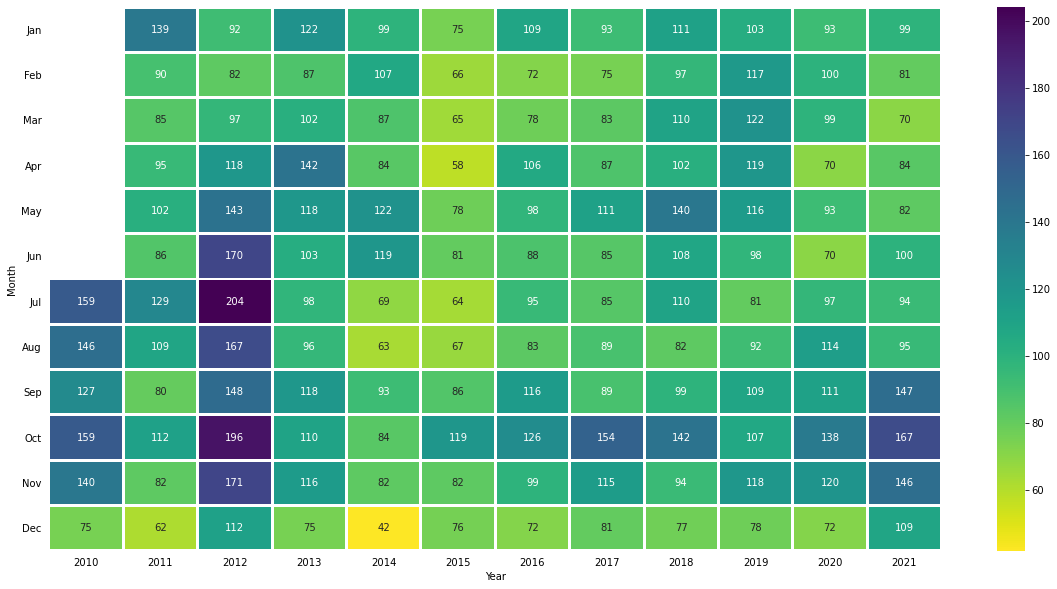

In [3]:
header = ["month"]
for year in range(2010, 2022):
    header.append(year)
total_count = [header]

for month in range(1,13):
    month_count = [calendar.month_name[month][0:3]]
    df_month = df[df["Reported_month"] == month]
    for year in range(2010, 2022):
        if year == 2010 and month <= 6: 
            month_count.append(np.NaN)
            continue
        df_year = df_month[df_month["Reported_year"] == year]
        month_count.append(len(df_year))
    total_count.append(month_count)

df_count = pd.DataFrame(total_count[1:], columns=total_count[0]).set_index("month")

sns.heatmap(df_count, annot=True, fmt = ".0f", linewidths=2, cmap = "viridis_r")
plt.xticks(rotation = 0)
plt.xlabel("Year")
plt.ylabel("Month")
plt.tick_params(top= False, bottom=False, left=False, right=False, labelbottom='on')
plt.gcf().set_size_inches(20, 10)
plt.show()

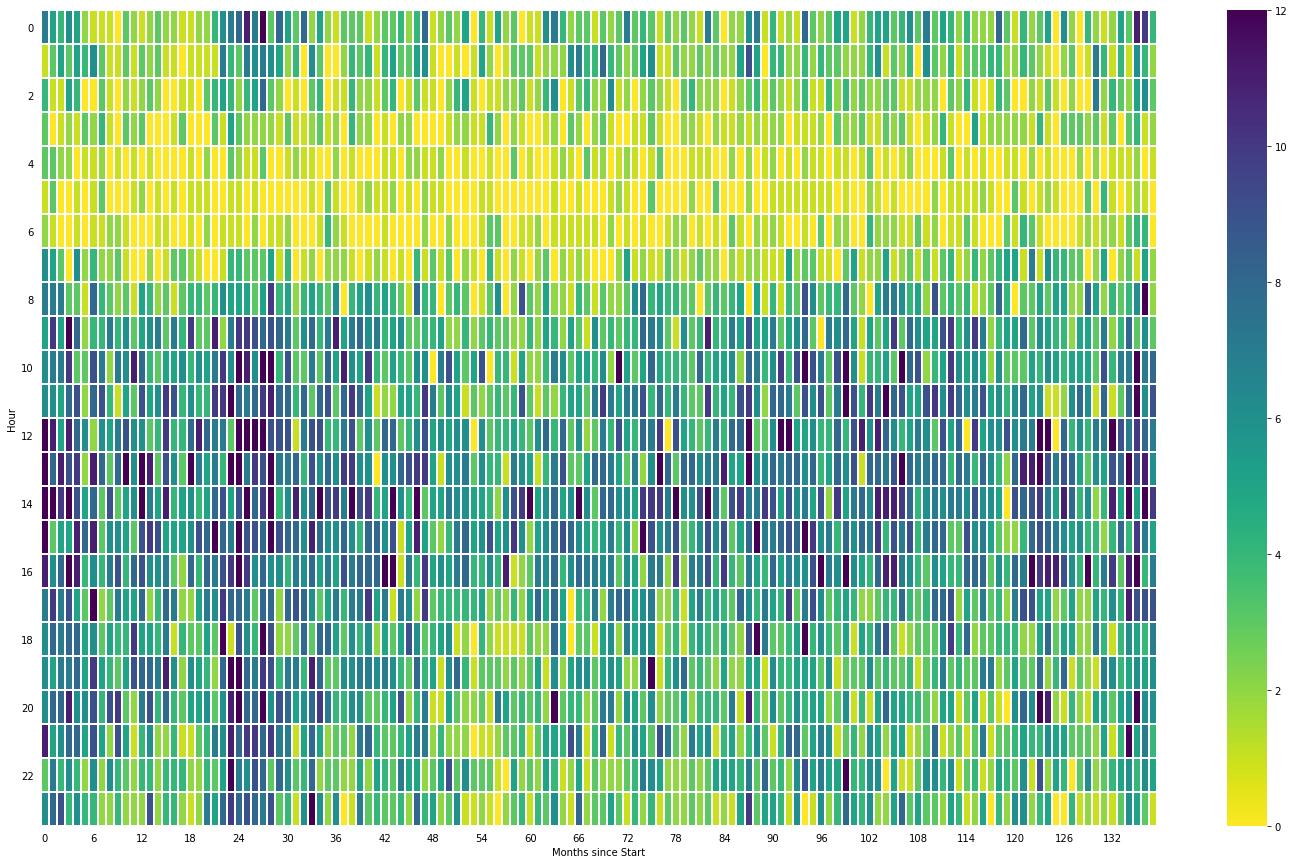

In [4]:
header = ["hour"]
for month in range(0, 138):
    header.append(month)
total_count = [header]

for hour in range(0,24):
    hour_count = [hour]
    df_hour = df[df["Reported_hour"] == hour]
    for month in range(0, 138):
        df_month = df_hour[df_hour["Months_since"] == month]
        hour_count.append(len(df_month))
    total_count.append(hour_count)

df_count = pd.DataFrame(total_count[1:], columns=total_count[0]).set_index("hour")

sns.heatmap(df_count, cmap = "viridis_r", linewidth=1, robust=True)
plt.xticks(rotation = 0)
plt.yticks(rotation = 0)
plt.xlabel("Months since Start")
plt.ylabel("Hour")
plt.tick_params(top= False, bottom=False, left=False, right=False, labelbottom='on')
plt.gcf().set_size_inches(25, 15)
plt.show()